In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks")

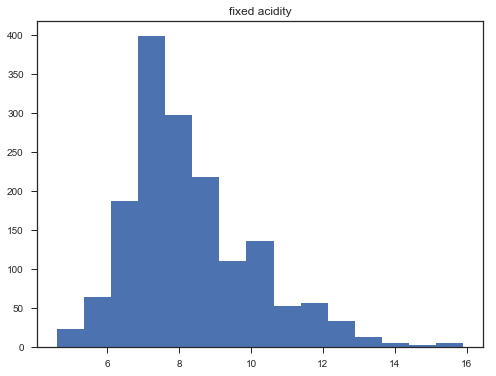

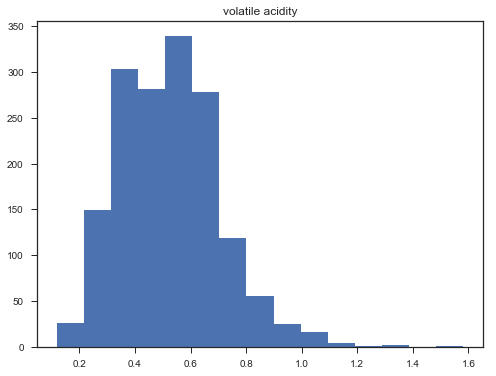

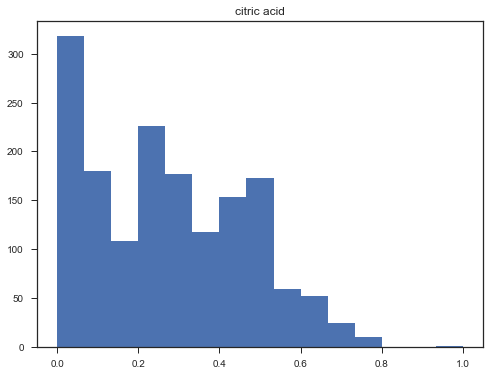

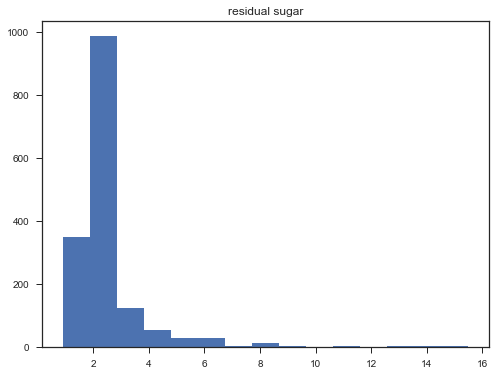

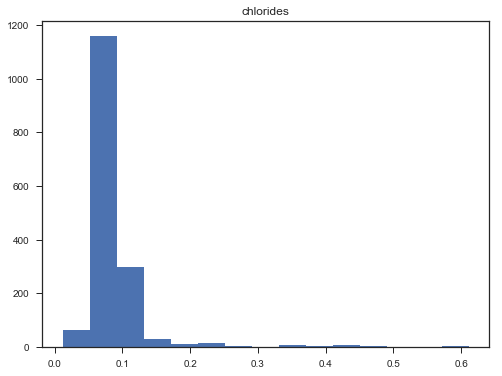

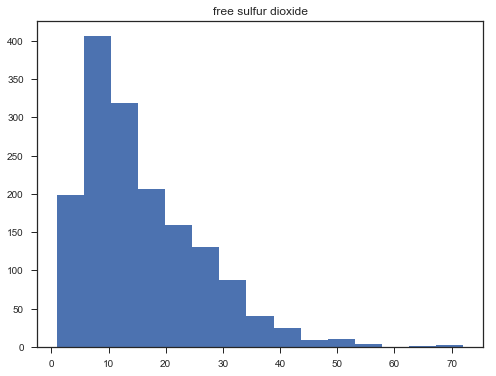

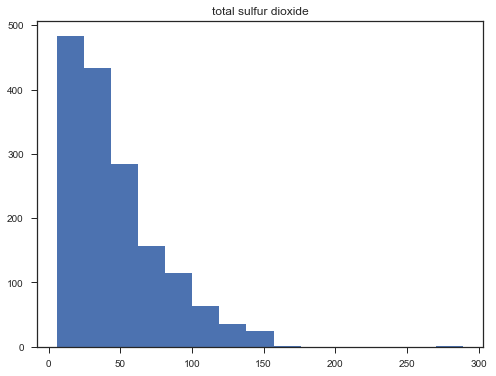

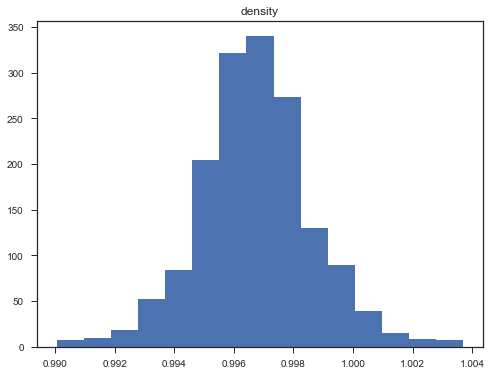

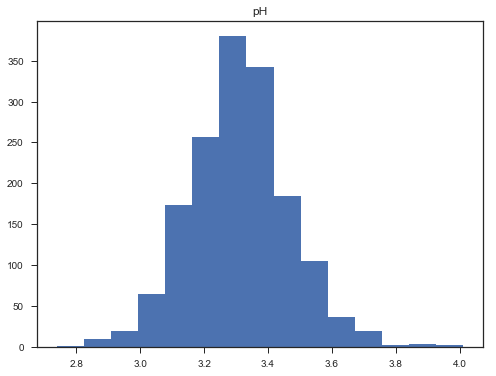

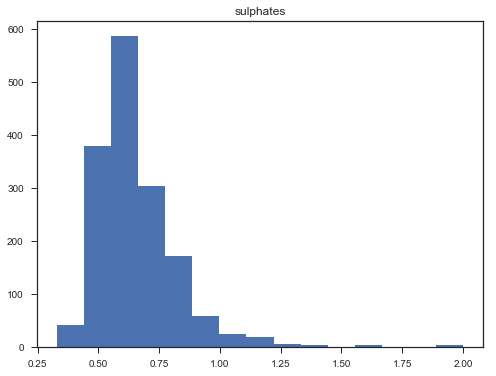

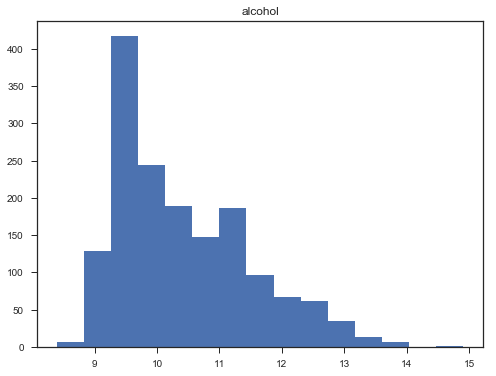

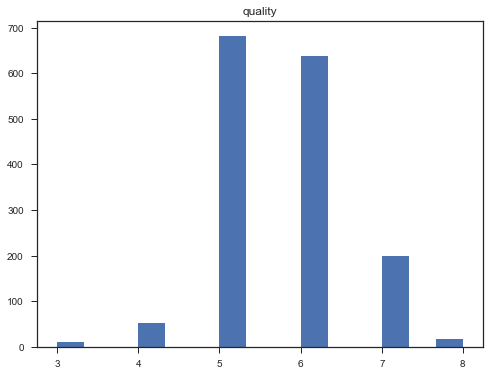

In [50]:
# =============================================================================
# I. Preprocessing
# =============================================================================
data = pd.read_csv('winequality-red.csv', sep=';')
data_2=data.values
titles=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
        'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

s=data.shape

cleaned_data = np.zeros((1451,s[1]))
mean_col=np.zeros(s[1])
std_col=np.zeros(s[1])



for j in range(s[1]):
    mean_col[j]=np.mean(data_2[:,j])
    std_col[j]=np.std(data_2[:,j])

a=0    
for i in range(s[0]):
    b=0
    for j in range(s[1]):
        if (data_2[i,j]>mean_col[j]+3*std_col[j] or data_2[i,j]<mean_col[j]-3*std_col[j]):
            b=b+1
    if b==0:
        cleaned_data[a,:] = data_2[i,:]
        a=a+1    
        

for k in range(s[1]):
    plt.figure(figsize=(8,6))    
    plt.hist(data_2[:,k], bins = 15)
    plt.title(titles[k])
    plt.show()        



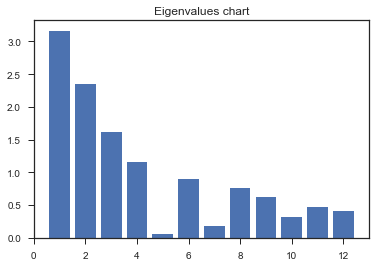

In [7]:
# =============================================================================
# PCA
# =============================================================================

X = cleaned_data 

###Normalisation###
mean = sum(X[:])/len(X)
var = sum(X[:]**2/len(X))-mean**2
X = X[:]-mean
X = X[:]/(var**(1/2))

###Eigenvalues/vectors###
D_vp,V = np.linalg.eig(np.dot(np.transpose(X),X)/(len(X)-1)) 
D = np.diag(D_vp)

axis_x = [i for i in range(1,13)]
axis_y = [i for i in D_vp]
plt.bar(axis_x,axis_y)
plt.title('Eigenvalues chart')
plt.show()

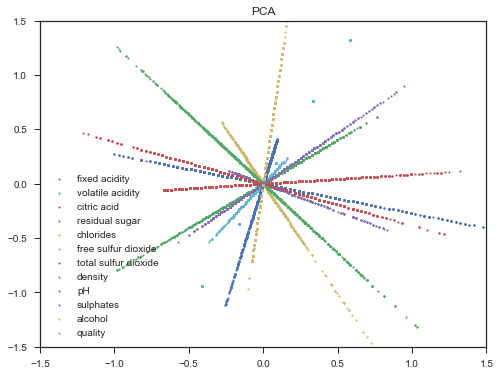

In [19]:
###Projections PCA###
PCA_x = np.zeros((len(X),12))
PCA_y = np.zeros((len(X),12))
for i in range(0,12) : PCA_x[:,i] = X[:,i]*V[i,0] 
for i in range(0,12) : PCA_y[:,i] = X[:,i]*V[i,1] 

plt.figure(figsize=(8, 6)) 
for ii in range(0,12):
    axis_x = [i for i in PCA_x[:,ii]]
    axis_y = [i for i in PCA_y[:,ii]]
    plt.scatter(axis_x, axis_y,s=3, label=titles[ii])
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
plt.legend(loc=3, prop={'size': 10}) 
plt.title('PCA')
plt.show()

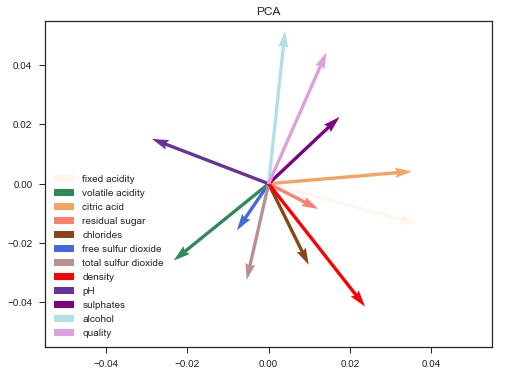

In [27]:
###Format vectoriel###

import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())
origin = [0], [0] 

plt.figure(figsize=(8, 6)) 
for ii in range(0,12):
    plt.quiver(*origin,V[ii,0],V[ii,1],scale=1.5,color=colors_list[-ii-40],label=titles[ii])

plt.legend(loc=3, prop={'size': 10}) 
plt.title('PCA')
plt.show()

In [33]:
# =============================================================================
# Multivariate linear regression
# =============================================================================
quality = X[:,11]
quality_mean = sum(quality)/len(X)


data_set = X[:,0:11]
mean_data_set = sum(data_set[:])/len(X)
data_set = data_set[:]- mean_data_set

xty = np.dot(np.transpose(data_set),quality)
xtx = np.dot(np.transpose(data_set),data_set)
beta = np.dot(np.linalg.inv(xtx),xty)

rss = sum((np.dot(data_set,beta) - quality_mean)**2)
quality_var = sum((quality - quality_mean)**2)
R2 = rss/quality_var
print('R2 =' ,R2)

R2 = 0.37965118295639894


In [35]:
###From normalized data###

data_set_norm = data_set - mean_data_set
var_data_set = sum(data_set[:]**2/len(X))-mean_data_set**2
data_set_norm = data_set_norm[:]/(var_data_set**(1/2))

xty = np.dot(np.transpose(data_set_norm),quality)
xtx = np.dot(np.transpose(data_set_norm),data_set_norm)
beta_norm = np.dot(np.linalg.inv(xtx),xty)

rss = sum((np.dot(data_set_norm,beta) - quality_mean)**2)
R2 = rss/quality_var
print('R2 =' ,R2)

R2 = 0.37965118296355543


In [36]:
# =============================================================================
# Lasso Regression
# =============================================================================
test_set = data_set_norm[500:-1]
train_set = data_set_norm[0:499]

test_Y = quality[500:-1] 
test_Y = test_Y - sum(test_Y[:])/len(test_Y)
train_Y = quality[0:499] 
mean_train_Y = sum(train_Y[:])/len(train_Y)
train_Y = train_Y - mean_train_Y

xtx =  np.dot(np.transpose(train_set),train_set)
xty = np.dot(np.transpose(train_set),train_Y)
beta = np.dot(np.linalg.inv(xtx),xty)

residual = train_Y - np.dot(train_set,beta)
rss = sum((np.dot(train_set,beta) - mean_train_Y)**2)
train_Y_var = sum((train_Y - mean_train_Y)**2)
R2 = rss/train_Y_var
print('R2 =' ,R2)

R2 = 0.3677338089304962


In [46]:
###Alghorithm###

N_test = 500
N_iter = 100
Lambda = np.arange(1,0,-0.005)
beta_matrix = np.zeros((11,len(Lambda)))
beta_matrix[:,0] = beta

a=0
for i in Lambda:
    beta_lasso = beta
    for ii in range(0,N_iter):
        residual = train_Y - np.dot(train_set,beta_lasso)
        u = beta_lasso + np.dot(np.transpose(train_set),residual)/N_test
        sign = u/abs(u)
        for iii in range(0,11):
            if abs(u[iii]) - round(i,3)/2 > 0:
                beta_lasso[iii] = sign[iii]*(abs(u[iii]) - round(i,3)/2)
            else:
                beta_lasso[iii] = 0
    beta_matrix[:,a] = beta_lasso
    a+=1


D:\Utilitaires\Anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
